In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy import sparse
matplotlib_axes_logger.setLevel('ERROR')

In [2]:
adata_gex=sc.read('/home/jovyan/data/covid_19_renal/renal_covid_19_gex_myeloid_soupX_QC.h5ad')

In [3]:
adata_gex

AnnData object with n_obs × n_vars = 220907 × 33559

In [4]:
adata_gex.X.max()

14004.289469167865

In [5]:
target_genes = pd.read_csv('/home/jovyan/scripts/renal_covid_19/sig_gene_plot/Macrophage_stim_markers_Human.csv')

In [6]:
target_genes.head()

,GC,HDL,IFNb,IFNg,IFNg_TNF,IL10,IL13,IL4,IL4_upLPS,LA,...,TNF_P3C,TNF_PGE2,TPP,TPP_IFNb,TPP_IFNb_IFNg,sLPS,sLPS_IC,sLPS_IFNg,upLPS,upLPS_IC
0,GLDN,LOC653352,C9orf38,GBP5,CSF1,HCFC1R1,ALOX15,ALOX15,ALOX15,MMP9,...,LRG1,GBP5,RGS16,C1QTNF1,PAMR1,CXCR7,MYBPC3,GBP5,PCNX,SRPX
1,SRPX,YIPF6,ACY3,LOC400759,CCL5,SPOCD1,FOXQ1,FOXQ1,IL17RB,UCK2,...,CXCR5,PCNX,NFS1,ZSWIM4,CXCR7,PTPRF,IL2RA,PCNX,ANG,TBL2
2,ZBTB16,MOGAT1,MGAT4B,CXCL9,C20orf123,P8,PPP1R14A,PPP1R14A,CCL26,FABP5,...,ALPL,GBP4,CCL5,PCNX,PTPRF,FAM108C1,CXCR7,GCH1,RNASE4,LRG1
3,TBC1D16,PRPF40A,LOC732424,GBP1,IL2RG,ADAMTSL4,DHRS11,MAOA,WNT5A,MMP7,...,CXCR7,RCN1,CYP27B1,FAM108C1,C1QTNF1,KIAA1199,PCNX,LOC399715,SPARC,MS4A6E
4,LOC647108,LOC642033,PITX2,GBP4,GBP4,CTSG,IL1R1,SOCS1,TGM2,ACADVL,...,NFS1,SLC5A3,GPR124,CXCR7,ZSWIM4,EMR3,MLLT6,MYBPC3,FTHL12,C1S


In [7]:
mdata = sc.read('/home/jovyan/mounting_point/renal_covid_19_gex_myeloid_soupX_QC_orig.ident_annotated_levle23.h5ad')

In [8]:
adata = adata_gex[adata_gex.obs.index.isin(mdata.obs.index)]

In [9]:
adata

View of AnnData object with n_obs × n_vars = 126622 × 33559

In [10]:
mdata

AnnData object with n_obs × n_vars = 126622 × 1215
    obs: 'annotation22_ES', 'centre', 'sample_id', 'sample_id_broad', 'sample_date', 'sample_date_yr', 'pool', 'pool_broad', 'haniffa_broad_predLabel', 'orig.ident', 'merged_souporcell_cluster', 'merged_souporcell_status', 'patient_id', 'case_control', 'WHO_severity', 'sex', 'calc_age', 'discharge_date', 'date_positive_swab', 'date_first_symptoms', 'admission_date', 'ethnicity', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden_0.8', '5_subcluster', '9_subcluster', 'annotation', 'annotation23_ES', 'annotation24_ES', 'annot3', 'annot2', 'annot1', 'leiden_0.5', 'annot4'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '5_subcluster_colors', '9_subcluster', '9_subcluster_colors', 'WHO_severity_colors', 'X_pca_harmony_orig.ident', 'annot1_colors', 'annot2_colors', 'annot3_colors', '

In [11]:
adata.obs['annot4'] = mdata.obs['annot4']
adata.obs['centre'] = mdata.obs['centre']
adata.obs['case_control'] = mdata.obs['case_control']
adata.obs['WHO_severity'] = mdata.obs['WHO_severity']
adata.obs['patient_id'] = mdata.obs['patient_id']

/tmp/ipykernel_9512/1107364442.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['annot4'] = mdata.obs['annot4']
/home/jovyan/my-conda-envs/Py_env2/lib/python3.8/contextlib.py:120: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


In [12]:
adata.obs['case_control'].unique()

['NEGATIVE', 'nan', 'POSITIVE', 'RECOVERY']
Categories (4, object): ['NEGATIVE', 'POSITIVE', 'RECOVERY', 'nan']

In [13]:
adata = adata[adata.obs['case_control']=='POSITIVE']

In [14]:
adata.obs['case_control'].unique()

['POSITIVE']
Categories (1, object): ['POSITIVE']

In [15]:
adata.obs['centre'].unique()

['NCL', 'Cambridge']
Categories (2, object): ['Cambridge', 'NCL']

In [16]:
adata.obs['WHO_severity'].unique()

['severe', 'critical', 'moderate', 'mild']
Categories (4, object): ['critical', 'mild', 'moderate', 'severe']

In [17]:
adata.obs['annot4'].unique()

['CD14mono', 'CD14mono_IFN', 'RBC', 'CD16mono', 'CD14mono_anti_inflammatory', ..., 'Platelet', 'Int.mono', 'DC3_IFN', 'CD16mono_IFN', 'ASDC']
Length: 17
Categories (17, object): ['ASDC', 'CD14mono', 'CD14mono_IFN', 'CD14mono_activated', ..., 'Int.mono', 'Platelet', 'RBC', 'pDC']

In [18]:
adata.obs['annot4'] = adata.obs['annot4'].str.replace('CD14mono_activated','CD14mono')
adata.obs['annot4'] = adata.obs['annot4'].str.replace('CD14mono_anti_inflammatory','CD14mono_alt_act')

/tmp/ipykernel_9512/2951339596.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['annot4'] = adata.obs['annot4'].str.replace('CD14mono_activated','CD14mono')


In [19]:
list(adata.obs['annot4'].unique())

['CD14mono',
 'CD14mono_IFN',
 'RBC',
 'CD16mono',
 'CD14mono_alt_act',
 'HSPC',
 'DC3',
 'CD16mono_C1',
 'DC2',
 'DC1',
 'pDC',
 'Platelet',
 'Int.mono',
 'DC3_IFN',
 'CD16mono_IFN',
 'ASDC']

In [20]:
adata = adata[adata.obs['annot4'].isin(['CD14mono','CD14mono_IFN', 'CD14mono_alt_act','CD16mono','CD16mono_C1','CD16mono_IFN','Int.mono'])]

In [21]:
list(adata.obs['annot4'].unique())

['CD14mono',
 'CD14mono_IFN',
 'CD16mono',
 'CD14mono_alt_act',
 'CD16mono_C1',
 'Int.mono',
 'CD16mono_IFN']

In [22]:
'C116' in list(adata.obs['patient_id'].unique())

False

In [23]:
'C139' in list(adata.obs['patient_id'].unique())

False

In [24]:
'C141' in list(adata.obs['patient_id'].unique())

True

In [25]:
adata.obs['annot4'].unique()

array(['CD14mono', 'CD14mono_IFN', 'CD16mono', 'CD14mono_alt_act',
       'CD16mono_C1', 'Int.mono', 'CD16mono_IFN'], dtype=object)

In [26]:
sc.pp.filter_cells(adata, min_genes=200)
#sc.pp.filter_genes(adata, min_cells=10)

/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


In [27]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
adata.var['ribo'] = adata.var_names.str.startswith(("Rps","Rpl"))
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt','ribo'],percent_top=None, log1p=False, inplace=True)

In [28]:
adata= adata[adata.obs.pct_counts_mt < 10, :]
adata

View of AnnData object with n_obs × n_vars = 59907 × 33559
    obs: 'annot4', 'centre', 'case_control', 'WHO_severity', 'patient_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [29]:
adata.X.max()

3685.822

In [30]:
sc.pp.normalize_total(adata, target_sum=1e4)

/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [31]:
sc.pp.log1p(adata)

In [32]:
target_genes.head()

,GC,HDL,IFNb,IFNg,IFNg_TNF,IL10,IL13,IL4,IL4_upLPS,LA,...,TNF_P3C,TNF_PGE2,TPP,TPP_IFNb,TPP_IFNb_IFNg,sLPS,sLPS_IC,sLPS_IFNg,upLPS,upLPS_IC
0,GLDN,LOC653352,C9orf38,GBP5,CSF1,HCFC1R1,ALOX15,ALOX15,ALOX15,MMP9,...,LRG1,GBP5,RGS16,C1QTNF1,PAMR1,CXCR7,MYBPC3,GBP5,PCNX,SRPX
1,SRPX,YIPF6,ACY3,LOC400759,CCL5,SPOCD1,FOXQ1,FOXQ1,IL17RB,UCK2,...,CXCR5,PCNX,NFS1,ZSWIM4,CXCR7,PTPRF,IL2RA,PCNX,ANG,TBL2
2,ZBTB16,MOGAT1,MGAT4B,CXCL9,C20orf123,P8,PPP1R14A,PPP1R14A,CCL26,FABP5,...,ALPL,GBP4,CCL5,PCNX,PTPRF,FAM108C1,CXCR7,GCH1,RNASE4,LRG1
3,TBC1D16,PRPF40A,LOC732424,GBP1,IL2RG,ADAMTSL4,DHRS11,MAOA,WNT5A,MMP7,...,CXCR7,RCN1,CYP27B1,FAM108C1,C1QTNF1,KIAA1199,PCNX,LOC399715,SPARC,MS4A6E
4,LOC647108,LOC642033,PITX2,GBP4,GBP4,CTSG,IL1R1,SOCS1,TGM2,ACADVL,...,NFS1,SLC5A3,GPR124,CXCR7,ZSWIM4,EMR3,MLLT6,MYBPC3,FTHL12,C1S


In [33]:
len(target_genes.columns)

28

In [34]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [35]:
overlap =[]
for i in range(0, len(target_genes.columns)):
    sc.tl.score_genes(adata, list(target_genes[target_genes.columns[i]]), ctrl_size=50, gene_pool=None, n_bins=25, score_name=(target_genes.columns[i]), random_state=0, copy=False)
    print(target_genes.columns[i])
    print(list(target_genes[target_genes.columns[i]]))
    get_le = intersection(list(target_genes[target_genes.columns[i]]),list(adata.var.index))
    overlap.append(get_le)

GC
['GLDN', 'SRPX', 'ZBTB16', 'TBC1D16', 'LOC647108', 'DAAM2', 'TFCP2L1', 'ADAMTS2', 'CFH', 'SESN1', 'PDGFD', 'METTL7A', 'MFGE8', 'PDGFC', 'AGRP', 'PICK1', 'CPM', 'SAP30', 'PDK4', 'EPDR1', 'FCGR3A', 'XLKD1', 'MS4A6E', 'ABLIM3', 'FLRT2', 'MAN1A1', 'DACT1', 'SHE', 'ALOX15B', 'PIK3IP1', 'PON2', 'TCN2', 'SERPINF1', 'EIF4A3', 'RNASE2', 'ALCAM', 'GLUL', 'C5orf62', 'LOC652541', 'IDH1', 'GIMAP1', 'EPS8', 'ECHDC3', 'MS4A4A', 'SLC40A1', 'AMY2B', 'TPST1', 'ELANE', 'CLIC2', 'CTNS', 'ADORA3', 'SHMT1', 'MPZL2', 'P2RY12', 'PLCH1', 'GPRC5C', 'GADD45B', 'FAH', 'TIMP4', 'KLF9', 'FBLN5', 'C1QA', 'ANTXR2', 'PRKCABP', 'CCL18', 'GAL3ST4', 'ANKS1A', 'C1QB', 'SNTB1', 'CLTC', 'GFRA2', 'SIGLEC10', 'SH3PXD2B', 'ACSS1', 'IL1R2', 'TLR4', 'GBGT1', 'SLED1', 'PEBP1', 'BRPF3', 'TEX2', 'BLVRB', 'ITGA9', 'DISP1', 'RNASE3', 'SOCS1', 'TSC22D3', 'OLAH', 'SLC1A3', 'SEPP1', 'KIF16B', 'C10orf128', 'LOC653631', 'AMY2A', 'BCL2L11', 'CD164', 'TXNIP', 'TFPI', 'F13A1', 'CD7']


/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


HDL
['LOC653352', 'YIPF6', 'MOGAT1', 'PRPF40A', 'LOC642033', 'UHMK1', 'MADCAM1', 'ASXL2', 'GOLPH4', 'LOC388458', 'HMGCR', 'ARID4B', 'FBXW7', 'CCDC110', 'GAS2L3', 'LOC727948', 'ITPRIPL2', 'AAK1', 'UGP2', 'PLEKHB2', 'TAZ', 'LOC730995', 'TSPAN12', 'RSPRY1', 'FLJ20309', 'LOC653515', 'RABGAP1', 'LOC646863', 'PAK2', 'RAD21', 'LOC649037', 'LOC196752', 'C4B', 'FGFR1', 'ABCD4', 'LOC644162', 'VPS13C', 'CDC2L2', 'PLEKHA1', 'MRAP', 'ATXN3', 'LOC649495', 'UBN2', 'FLJ44674', 'FCN2', 'HRB', 'PUM1', 'LOC441662', 'WHAMM', 'FLJ22184', 'LOC643953', 'LOC652455', 'OPA3', 'UGCGL1', 'LOC642335', 'ZBTB34', 'LOC652726', 'LOC441155', 'SPINLW1', 'RAB40C', 'LOC652802', 'NBPF20', 'BLZF1', 'SSX4', 'BAZ1A', 'NDRG4', 'LOC642628', 'ARL8A', 'INS-IGF2', 'LOC650950', 'SC4MOL', 'PHKA2', 'MLANA', 'C20orf94', 'MDM2', 'C4orf31', 'HYDIN', 'SLC12A1', 'PPTC7', 'SRFBP1', 'PDXDC2', 'TAF13', 'GNE', 'FAM181A', 'LOC649260', 'MLL5', 'ALKBH8', 'RGNEF', 'LOC643913', 'LOC730196', 'CMYA3', 'CNBD1', 'LOC651167', 'PPFIBP1', 'NUDT4P1', 'LOC

/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


IFNb
['C9orf38', 'ACY3', 'MGAT4B', 'LOC732424', 'PITX2', 'CNDP1', 'NRG2', 'HCRTR2', 'C6orf52', 'GAGE1', 'C6orf134', 'LOC728081', 'MOG', 'TNXB', 'RKHD1', 'LOC653206', 'C16orf90', 'ZNF30', 'IFI27', 'MTTP', 'UTP20', 'LYZL4', 'LOC440013', 'MBLAC1', 'LOC644976', 'DKFZp761O2018', 'ZNF77', 'MARVELD2', 'FAM155A', 'FAM110C', 'TTC7A', 'LOC647681', 'TLR3', 'LOC645334', 'LOC650881', 'LOC643747', 'C9orf29', 'MYF5', 'LOC132707', 'LOC644975', 'LOC392221', 'AXL', 'LOC647680', 'LOC441847', 'CPXM2', 'TMC3', 'LOC128322', 'C9orf135', 'GRP', 'LOC644662', 'SRPX', 'PRAMEF1', 'PADI4', 'ZNF667', 'SNORA33', 'NLRP11', 'LOC442517', 'ZNF468', 'PHLPP2', 'PCDHB3', 'GAGE5', 'ST8SIA6', 'LOC642685', 'FLJ39061', 'NKD1', 'CCDC80', 'ATF7IP2', 'LOC644444', 'NWD1', 'CAPZA3', 'C8orf22', 'LOC283278', 'ZC3H18', 'LOC653441', 'LOC731884', 'NAV3', 'SLC35C1', 'FOXA2', 'FIBP', 'LOC648735', 'LOC643692', 'TMEM110', 'LOC642595', 'LOC732226', 'LOC647666', 'WDR73', 'NXF2B', 'KIAA1143', 'LOC440292', 'TTTY5', 'OAS2', 'HSFY1', 'DYX1C1', 'T

/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


IFNg
['GBP5', 'LOC400759', 'CXCL9', 'GBP1', 'GBP4', 'FAM26F', 'CXCL10', 'WARS', 'APOBEC3A', 'SERPING1', 'IRF1', 'RARRES3', 'AIM2', 'STAT1', 'IL27', 'HAPLN3', 'ANKRD22', 'GCH1', 'C9orf109', 'BPI', 'GBP2', 'BATF2', 'VAMP5', 'CD274', 'MDK', 'TAP1', 'ETV7', 'UBE2L6', 'EDN1', 'APOL3', 'SLC6A12', 'RHBDF2', 'PARP14', 'Sep-04', 'PSMB9', 'ITGB7', 'JAK2', 'SNX10', 'MUC1', 'MGC33556', 'ASCL2', 'CFB', 'CD38', 'PSME2', 'IFIT2', 'BTN3A1', 'LAP3', 'CUL1', 'C20orf123', 'ELF4', 'WDFY1', 'COLQ', 'NFIX', 'APOL6', 'XKR8', 'PPARGC1B', 'C21orf7', 'SLAMF7', 'NCF1C', 'GPC4', 'XRN1', 'RCN1', 'FAM126B', 'STX11', 'AKIRIN2', 'FCGR1A', 'C15orf24', 'PRRX1', 'APOL2', 'HLA-G', 'CTRL', 'PLEKHO1', 'FEM1C', 'CRYAB', 'ZBTB43', 'SLCO4A1', 'PSMB10', 'PATL1', 'CCL8', 'PARP3', 'SP140', 'EAF1', 'SCML1', 'REC8', 'ELMO2', 'MATK', 'BTN3A3', 'SSPN', 'LOC652616', 'HLA-E', 'TMEM140', 'IFIT3', 'LOC730249', 'CSRNP2', 'PTPN1', 'LOC284672', 'LOC650518', 'ZNFX1', 'TIFA', 'C18orf8']


/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


IFNg_TNF
['CSF1', 'CCL5', 'C20orf123', 'IL2RG', 'GBP4', 'GPR124', 'CXCL9', 'CYP27B1', 'PPME1', 'GBP5', 'PARP3', 'TSPAN3', 'NFS1', 'CTTN', 'FTHL3', 'TMEM132A', 'WARS', 'RHBDF2', 'NCF1C', 'SLC29A1', 'TRIM56', 'FTHL11', 'MANBAL', 'IKBKE', 'MITF', 'XPC', 'PCNX', 'SRPR', 'ACVR1B', 'EFTUD1', 'CD82', 'ENO2', 'FTHL12', 'RHBDD1', 'ZNF585A', 'FAM119B', 'ZSWIM4', 'C1orf66', 'LOC283050', 'RCN1', 'TERF2IP', 'KCTD13', 'UBD', 'CNIH4', 'BHLHB3', 'GPC4', 'SCARF1', 'SLCO4A1', 'CLN5', 'FNBP4', 'SNX10', 'SERPING1', 'SPG11', 'NCF1', 'C9orf164', 'GDI1', 'CRISPLD2', 'SLC1A5', 'CSRNP2', 'TMEM194', 'TRAF3IP2', 'APBA3', 'BAZ1B', 'SPTAN1', 'KIF1B', 'PARP14', 'TMEM140', 'CBX8', 'LOC652616', 'ZNF385A', 'PFTK1', 'C9orf30', 'SLC3A2', 'EBAG9', 'ISCU', 'TBX19', 'CXCL10', 'MKLN1', 'FTHL2', 'LAT', 'ZNF436', 'GATAD2B', 'UQCC', 'HLA-F', 'YPEL4', 'CD38', 'APOL3', 'RHBDF1', 'PSME2', 'MT1G', 'MT1E', 'CD86', 'HDGF', 'FMNL3', 'NES', 'SLC6A12', 'CCDC109A', 'CALCOCO1', 'ASCL2', 'GUCY1A3']


/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


IL10
['HCFC1R1', 'SPOCD1', 'P8', 'ADAMTSL4', 'CTSG', 'CEACAM1', 'GADD45G', 'NUPR1', 'ANXA11', 'S100P', 'ZNF16', 'NGFRAP1', 'BOK', 'AGRP', 'TCEAL3', 'LOC401321', 'CTRL', 'CDCA4', 'RNF126', 'FCGR3A', 'LOC387934', 'TP53I13', 'LOC652541', 'SEZ6L2', 'SPATA2L', 'RBP3', 'CAT', 'RBP1', 'FCGR1B', 'VEGFB', 'RILPL1', 'KIAA0194', 'NRP2', 'LOC653199', 'PCOLCE2', 'PIP', 'PRKRIP1', 'ABCF1', 'GPRIN3', 'APOC1', 'TMEM127', 'TNNT1', 'LOC652839', 'KCNQ1', 'CCDC92', 'ZNF687', 'C1orf152', 'FABP3', 'EAF1', 'SFRS12', 'KRT77', 'IL17RB', 'C20orf186', 'C10orf71', 'CCDC106', 'C15orf17', 'PCSK5', 'GCHFR', 'CLEC7A', 'CORO2A', 'TREM2', 'FAM104B', 'TCN1', 'SIL1', 'SLC16A5', 'DPEP3', 'FAM82A2', 'CDK9', 'LOC643870', 'CPE', 'DPP4', 'SHPK', 'ZNF668', 'NACAP1', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


IL13
['ALOX15', 'FOXQ1', 'PPP1R14A', 'DHRS11', 'IL1R1', 'MAOA', 'CTNNAL1', 'RASL10A', 'ESPNL', 'ACOT7', 'SLC39A10', 'RTKN', 'EGLN3', 'IL1R2', 'DTNA', 'GALNTL4', 'HCFC1R1', 'HOMER2', 'MGC4677', 'LOC643007', 'NMNAT3', 'TPM2', 'CYLC2', 'XPNPEP2', 'RNU2-1', 'RAB40B', 'CRH', 'NMD3', 'SOCS1', 'ITPRIPL1', 'C1orf50', 'CDR2L', 'RAB33A', 'SOX8', 'THEX1', 'ZNF808', 'ALDH5A1', 'LOC641848', 'PPM1F', 'PROC', 'BATF3', 'KRT17', 'MRPL55', 'RAP1GAP', 'LOC387934', 'FCER2', 'APPL1', 'PPP1R16A', 'PALLD', 'C1orf54', 'C14orf173', 'C1orf218', 'ZNF16', 'ETV6', 'CBR3', 'LOC284023', 'NFIL3', 'ABAT', 'SYT17', 'GPD1L', 'IGF2BP2', 'EPN2', 'DENND4C', 'ST13', 'DKFZp761P0423', 'RPL13L', 'PLCB1', 'CLYBL', 'HSPC159', 'CERK', 'RPL14', 'ADAM12', 'SHPK', 'RHCE', 'RRP1B', 'SLC30A4', 'LOC152195', 'C17orf87', 'C19orf12', 'GK2', 'PTRF', 'FAM26C', 'KCNQ1', 'ISYNA1', 'LOC730432', 'FAM44B', 'EGR3', 'C14orf78', 'ZNF317', 'METTL7A', 'ADO', 'TTC9C', 'TSKU', 'GOLGA8B', 'UQCRH', 'ASCL2', 'MUTED', 'RGS10', 'LOC654074', 'NFX1']


/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


IL4
['ALOX15', 'FOXQ1', 'PPP1R14A', 'MAOA', 'SOCS1', 'HOMER2', 'RAB33A', 'GALNTL4', 'CDR2L', 'CTNNAL1', 'DHRS11', 'ESPNL', 'FCER2', 'CBR3', 'PALLD', 'BATF3', 'ACOT7', 'NMNAT3', 'RRP1B', 'MGC4677', 'ANKRD20A1', 'DUOXA1', 'RASL10A', 'ITPRIPL1', 'IL1R2', 'DUOX1', 'RAMP1', 'SYT17', 'SOX8', 'EPN2', 'WNT5B', 'DTNA', 'CCL26', 'DHRS2', 'WNT5A', 'SUCNR1', 'DKFZp761P0423', 'GOLGA8B', 'CCDC90A', 'KRT17', 'PELP1', 'CLIC2', 'PPM1F', 'XPNPEP2', 'FAM126A', 'RTKN', 'AUH', 'NAGPA', 'ASCL2', 'RAP1GAP', 'ARHGAP10', 'IL1R1', 'KIAA1671', 'LOC152195', 'TPM2', 'C1orf54', 'CD209', 'TTC9C', 'DAGLA', 'MAP1A', 'C17orf87', 'CRH', 'GFRA2', 'ST6GAL1', 'IGF2BP2', 'CCNH', 'ETV6', 'CKB', 'PFKP', 'SLA', 'HARS2', 'ARV1', 'RAB40B', 'SHPK', 'GPD1L', 'CHES1', 'ITM2C', 'THEX1', 'MMP12', 'CCL22', 'GOLGA8A', 'ZNF366', 'C1orf218', 'GALNT12', 'FCER1A', 'C14orf173', 'PTRF', 'MAL', 'CCL17', 'BCAR3', 'HLX', 'ALDH5A1', 'EGLN3', 'HES6', 'CERK', 'IRF4', 'FZD2', 'CAMK1D', 'PHF17', 'CCL15']


/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


IL4_upLPS
['ALOX15', 'IL17RB', 'CCL26', 'WNT5A', 'TGM2', 'GALNTL4', 'FOXQ1', 'MAOA', 'LHFP', 'SOCS1', 'C17orf58', 'CCL5', 'UST', 'DHRS11', 'CCL18', 'ACOT7', 'PPP1R14A', 'PLAT', 'CTNNAL1', 'HOMER2', 'CLEC4G', 'FCER2', 'ACPL2', 'METTL1', 'NFS1', 'BATF3', 'CD209', 'ABCB4', 'RCN1', 'DUOX1', 'SLAMF1', 'SULT1C2', 'HOPX', 'IL1R2', 'CHN2', 'PDCD1LG2', 'CRH', 'PALLD', 'LRRC32', 'C17orf87', 'G6PD', 'ACOX3', 'GGT5', 'LYRM1', 'MAT2A', 'RAMP1', 'AUH', 'CCL17', 'SHPK', 'C3orf21', 'CCL23', 'GADD45A', 'ZNF317', 'CD274', 'IL3RA', 'ESPNL', 'C1QTNF1', 'IL2RA', 'PELP1', 'RNF19B', 'AK2', 'SEMA4A', 'PTPRE', 'CTTN', 'CYP27B1', 'ZWILCH', 'ST6GAL1', 'ADAM19', 'CFB', 'ARRDC4', 'CCDC6', 'ITPRIPL1', 'ETV6', 'DAAM1', 'MATK', 'PKD2', 'BID', 'PTGES2', 'SPINT2', 'SLC5A3', 'C1S', 'GNL3', 'CD200', 'SIGLEC10', 'BCAR3', 'PPRC1', 'DCUN1D3', 'GART', 'FLJ11795', 'TNFRSF6B', 'SRGN', 'GCNT3', 'EHF', 'CCL15', 'CCDC90A', 'MRPS6', 'ALDH9A1', 'SYN1', 'SMAD6', 'DNASE1L3']


/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


LA
['MMP9', 'UCK2', 'FABP5', 'MMP7', 'ACADVL', 'MT1G', 'MARCKSL1', 'PPAN', 'MATK', 'AQP9', 'C15orf48', 'MRTO4', 'METTL1', 'MT1H', 'NOLC1', 'SPHK1', 'MT1A', 'CCL24', 'RCN1', 'ABCC3', 'TM7SF4', 'PHLDB1', 'TGM2', 'KIAA0020', 'EMR2', 'MT2A', 'PPP1R14B', 'FDX1L', 'SELI', 'WDR4', 'SLC5A6', 'PTPRM', 'SLC22A4', 'PRMT5', 'LOC283050', 'SLC16A3', 'GPR84', 'ANPEP', 'SPATS2L', 'GNA12', 'GPATCH4', 'MT1F', 'PDLIM7', 'CD82', 'PTRH2', 'ABHD2', 'MYOZ1', 'EBNA1BP2', 'C12orf59', 'C1orf122', 'POLR1C', 'CCDC86', 'APOE', 'NME1', 'IPO4', 'TBL2', 'ST14', 'FLNB', 'SERF1B', 'CPT1A', 'CCL7', 'PPRC1', 'BCCIP', 'MPP6', 'ACSL3', 'CTPS', 'ECE2', 'GPR172A', 'Magmas', 'SEPW1', 'PSMA6', 'C3orf26', 'TRAF3IP2', 'MT1X', 'RPL34', 'MRPL14', 'SLCO4C1', 'ATP1A1', 'IL1RN', 'TXNDC14', 'CTU2', 'PLAUR', 'PAICS', 'IKBKE', 'MGST1', 'HSPC111', 'C10orf2', 'CCDC109A', 'AADACL1', 'TPST1', 'TOMM40', 'STIP1', 'FAM20C', 'MTHFD1L', 'FGFRL1', 'MREG', 'INO80C', 'CD276', 'TM4SF19', 'FGR']


/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


LiA
['ACADVL', 'PDK4', 'G6PD', 'ACAA2', 'MT1G', 'AQP9', 'METTL1', 'NRIP3', 'PLIN2', 'C15orf48', 'CPT1A', 'FABP4', 'MMP9', 'ABCC3', 'MATK', 'PUS7', 'SEL1L', 'UCK2', 'MGC4677', 'ST14', 'SLC25A20', 'MFSD10', 'IMPAD1', 'WDR4', 'PAICS', 'MRTO4', 'SELI', 'SLC16A3', 'PLXNA1', 'TOMM70A', 'MT1A', 'TOMM40', 'TGM2', 'FABP5', 'BOLA2', 'RRP15', 'FGR', 'BCCIP', 'SNORA33', 'GPR180', 'MT1F', 'SLC25A22', 'MT1H', 'ALDH1A2', 'C15orf24', 'UBE2D4', 'DKC1', 'TMEM33', 'MARCKSL1', 'NETO2', 'ABHD2', 'DPH2', 'PDLIM7', 'PHLDB1', 'HS3ST1', 'PRDX4', 'MARS2', 'RCN1', 'TFB2M', 'SLC7A11', 'PTPLA', 'PUS1', 'SRPRB', 'DDX31', 'FBXL6', 'EML4', 'EBNA1BP2', 'AADACL1', 'NFKBIE', 'GPATCH4', 'GNL3', 'TFRC', 'ATP2C1', 'UGCGL2', 'HSP90B1', 'CIRH1A', 'CXorf26', 'MMP7', 'CCDC76', 'TRAF3IP2', 'EMR2', 'CCDC99', 'FKBP4', 'RAPGEF1', 'SNRPA1', 'MT1E', 'IGF2R', 'SLC22A4', 'MRPL14', 'PSMA6', 'PSMA5', 'EXOG', 'PDE12', 'ETFDH', 'HSPC111', 'ZMPSTE24', 'RABGGTB', 'SCOC', 'MREG', 'ASB1']


/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


OA
['ACADVL', 'MT1G', 'MT1H', 'MARCKSL1', 'MT1X', 'CPT1A', 'ST14', 'MT1A', 'MT1F', 'PDK4', 'UCK2', 'MT2A', 'SLC25A20', 'NOLC1', 'MT1E', 'C15orf48', 'MMP9', 'FABP5', 'METTL1', 'WDR4', 'AQP9', 'SLC16A3', 'EXOG', 'BCCIP', 'MTE', 'CTPS', 'HS3ST1', 'MT1JP', 'PPAN', 'RCN1', 'PRMT5', 'KIAA0020', 'EBNA1BP2', 'UBE2D4', 'PHLDB1', 'C3orf26', 'TGM2', 'PAICS', 'DPH2', 'ANPEP', 'PTPRM', 'PLIN2', 'GPATCH4', 'MRPL14', 'SLC22A4', 'PUS7', 'ABCC3', 'DKC1', 'MRTO4', 'AADACL1', 'TSPAN13', 'SPATS2L', 'IPO4', 'NME1', 'SLC5A6', 'BRIX1', 'CCDC86', 'PRDX4', 'GRWD1', 'MARS2', 'PPRC1', 'GNA12', 'IKBKE', 'MGC4677', 'ECE2', 'PLXNA1', 'HSPC111', 'PPIL1', 'CTU2', 'POLR1C', 'MATK', 'MAOA', 'STEAP1', 'RPL34', 'SEPW1', 'SNRPA1', 'GPR84', 'IL4I1', 'SRM', 'ACAA2', 'ABHD2', 'SPHK1', 'PDE1B', 'FLNB', 'TXNDC14', 'BOLA3', 'PTRH2', 'DDX10', 'ALDH1A2', 'C20orf127', 'XYLB', 'FAM86A', 'MFSD10', 'EMG1', 'MTHFD1L', 'NOMO2', 'MREG', 'PPP1R14B', 'NIT2', 'FAM86C']


/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


P3C
['CTSL1', 'CXCL1', 'FJX1', 'CXCL12', 'C13orf18', 'HIF1A', 'ELL2', 'PDK4', 'RBP1', 'SLC16A10', 'MMP7', 'TFRC', 'CCL18', 'RARRES1', 'KIAA1199', 'MS4A7', 'CD59', 'CXCL5', 'STAT4', 'FTHL2', 'FTHL3', 'ELMO2', 'DLL1', 'DUSP4', 'VNN2', 'PLAGL2', 'SMPDL3A', 'FCAMR', 'LXN', 'MET', 'BRPF3', 'IGFBP4', 'TNIP3', 'VMO1', 'CCL23', 'ARNT2', 'MAP3K8', 'PPBP', 'FTHL12', 'CD209', 'ANTXR2', 'CXCL6', 'C5orf62', 'TMEM127', 'FAM108C1', 'HS3ST1', 'TFPI', 'WBP5', 'ZHX2', 'CLEC4G', 'ATP1B3', 'PLIN2', 'IBSP', 'CDCA4', 'FTHL11', 'GLUL', 'APH1B', 'CD300LG', 'HMOX1', 'NINJ1', 'CSF2', 'SRGN', 'TNFRSF21', 'DDAH1', 'IFNAR1', 'TMEM50A', 'THEM2', 'IL6', 'TMEM37', 'APIP', 'LOC646431', 'GK5', 'BMP6', 'TMEM2', 'EDG1', 'FTHL8', 'SSTR5', 'CXCL2', 'RIT1', 'ITGA9', 'CYP3A5', 'EBF1', 'TIMP1', 'STOM', 'SEMA3A', 'MAPK13', 'WIPI1', 'PLA2G7', 'ADARB1', 'FCHO2', 'MPP5', 'CXCR7', 'TRAF3IP2', 'FTH1', 'GADD45B', 'LOC389422', 'CDY2B', 'LOC653962', 'ABCA1', 'CHI3L2']


/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


P3C_PGE2
['THBS1', 'SPTLC3', 'LRP5', 'EMR3', 'VMO1', 'RBP1', 'ERRFI1', 'STAT4', 'SLC16A10', 'SERINC2', 'TFPI', 'RUNX3', 'SERPINB2', 'PIM2', 'HMGB3', 'PLEKHG2', 'CTSL1', 'GNA12', 'ATP13A3', 'SMOX', 'CXCL5', 'MS4A7', 'LOC730744', 'HIF1A', 'TFRC', 'EPAS1', 'RAPGEF1', 'MAMLD1', 'PRDM8', 'PDE4B', 'ANTXR2', 'PGS1', 'PIP', 'COL23A1', 'EPB41L3', 'IVNS1ABP', 'SATB1', 'CXCR7', 'METRNL', 'KL', 'PDK4', 'DNAH17', 'SYTL3', 'INSM1', 'ATP1B3', 'GNA15', 'ASMTL', 'IL2RA', 'MAP1LC3C', 'PLAUR', 'TRAF3IP2', 'EBF1', 'ELMO2', 'FTHL3', 'PLAGL2', 'TMEM2', 'FTHL11', 'FCAMR', 'CRLF2', 'PDE4D', 'TCF4', 'CXCL16', 'FAIM3', 'PANX2', 'FTHL12', 'PPBP', 'ABP1', 'ZZEF1', 'BMP6', 'BRPF3', 'MXD1', 'TMEM127', 'ST3GAL1', 'WDR52', 'FLJ35880', 'VNN2', 'LOR', 'NEFH', 'FAM174A', 'SLC7A11', 'CSF2RA', 'MPZL1', 'FSD1CL', 'DDX17', 'KIAA1199', 'LOC653066', 'FTHL2', 'SPEN', 'REV3L', 'ARID3B', 'KCNE1L', 'SRGN', 'ARHGAP20', 'NAMPT', 'LOC653506', 'C3orf59', 'PTPN9', 'APH1B', 'CXCL1', 'ETS2']


/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


PA
['MMP7', 'FAM82A2', 'TIMP3', 'HTRA4', 'MCOLN3', 'ACADVL', 'METTL1', 'FGR', 'TRIM9', 'MATK', 'LOC283050', 'ASPHD1', 'C15orf48', 'GDF15', 'NRIP3', 'GPC4', 'AQP9', 'UCHL1', 'FABP5', 'RCN1', 'MYOZ1', 'MGST1', 'FICD', 'GNL3', 'ST6GALNAC4', 'MYBPH', 'TGM2', 'DPYSL3', 'IL1RN', 'SRPRB', 'SLC7A11', 'MMP9', 'SELS', 'BEX2', 'SPHK1', 'SLC6A6', 'TM4SF19', 'ABCC3', 'TXNRD1', 'G6PD', 'PLIN2', 'TFRC', 'STX4', 'HYOU1', 'NCAM1', 'LONRF3', 'GLA', 'TRAF3IP2', 'PFTK1', 'HES4', 'FAM20C', 'PLEKHF1', 'SELI', 'SLC35B1', 'FLNB', 'PMM2', 'MRTO4', 'GPR172A', 'SRXN1', 'RSC1A1', 'UCK2', 'MITF', 'PRKCH', 'SOX13', 'MREG', 'IL1F5', 'TOMM40', 'GFPT1', 'FBXO15', 'PRKAG2', 'NMT2', 'MME', 'BAALC', 'PHLDB1', 'SLC16A10', 'TNS3', 'PREB', 'CD82', 'PSMD14', 'BTG3', 'PELO', 'CCL24', 'FUT4', 'FREQ', 'TBL2', 'TPST1', 'KIAA0564', 'GNA12', 'PSMA6', 'CXXC5', 'GREM1', 'SLC3A2', 'SEC61A1', 'PTRH2', 'BID', 'TM7SF4', 'TMEM38B', 'FLJ10081', 'SERPINE2', 'KHDRBS3']


/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


PGE2
['SPTLC3', 'LRP5', 'RBP1', 'PIP', 'ERRFI1', 'THBS1', 'SERPINB2', 'SATB1', 'PDK4', 'SERINC2', 'SLC16A10', 'VTN', 'IL18R1', 'STAT4', 'CTSL1', 'PBLD', 'FAIM3', 'PCSK5', 'ANKRD9', 'RDH10', 'TFPI', 'VMO1', 'SLC25A20', 'IL18RAP', 'EPAS1', 'CSF2', 'CABLES1', 'RASD2', 'RUNX3', 'TFRC', 'STMN1', 'PGS1', 'COL23A1', 'WIPI1', 'HIF1A', 'EMR3', 'PDE1B', 'PPAP2A', 'CXCL5', 'PPBP', 'TMEM127', 'LOC730744', 'KITLG', 'OCRL', 'C8orf46', 'ABHD6', 'TGFA', 'PIM2', 'ZZEF1', 'ARHGAP20', 'HSDL2', 'SLC35B4', 'CD19', 'SRGN', 'CTHRC1', 'DPP4', 'EMILIN2', 'CXCR5', 'FUZ', 'HS3ST1', 'RHOBTB3', 'METRNL', 'SLC25A44', 'GATS', 'FCRL3', 'IGFBP4', 'CXCL1', 'CD79A', 'CCL23', 'PDE4B', 'MAP1LC3C', 'SLC26A1', 'MS4A7', 'UBXN2A', 'LOC642113', 'IVNS1ABP', 'PLEKHG2', 'BAIAP2', 'TIMP1', 'ZNF613', 'CXCL2', 'CCL18', 'SYTL3', 'NUP214', 'FCAMR', 'VNN2', 'PKIB', 'GNG11', 'CD79B', 'KIAA1199', 'MALT1', 'ATP6V0E1', 'LOC727948', 'HMGB3', 'FTHL2', 'SIDT1', 'ZNF193', 'TTYH3', 'ARL4C', 'LOC653506']


/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


SA
['MT1G', 'C15orf48', 'METTL1', 'MMP7', 'ACADVL', 'AQP9', 'RCN1', 'UCK2', 'SELI', 'MATK', 'SPHK1', 'PHLDB1', 'MMP9', 'MT1H', 'MT1A', 'ABCC3', 'SLC6A6', 'FREQ', 'LOC283050', 'SLC7A11', 'MT1F', 'FABP5', 'TPST1', 'PTRH2', 'GNA12', 'SRPRB', 'NRIP3', 'MT2A', 'NOLC1', 'MGST1', 'MREG', 'DPYSL3', 'MARCKSL1', 'PSMA6', 'TRAF3IP2', 'HYOU1', 'GNL3', 'TFRC', 'PLXNA1', 'TGM2', 'CPT1A', 'MRTO4', 'MMP19', 'FGR', 'ABHD2', 'WDR4', 'CD82', 'MCOLN3', 'NMT2', 'EMR2', 'TMEM38B', 'SLC22A4', 'SLC35B1', 'PFTK1', 'MT1E', 'SELS', 'FLNB', 'TOMM40', 'PMM2', 'PLIN2', 'TM4SF19', 'G6PD', 'BTG3', 'PPAN', 'CXCL5', 'HES4', 'MRPL14', 'PREB', 'MFSD10', 'ECE2', 'TNFRSF9', 'MAOA', 'PDLIM7', 'GPR172A', 'GPR84', 'PPRC1', 'GLA', 'SCG5', 'CES4', 'MEI1', 'IL1RN', 'KPNB1', 'NCAM1', 'MGC4677', 'SLC5A6', 'SLC1A3', 'RSC1A1', 'NFKBIE', 'ST14', 'CD58', 'LRWD1', 'BID', 'PELO', 'TBL2', 'FAM82A2', 'ST6GALNAC4', 'UCHL1', 'KIAA0020', 'PSMA5', 'FICD']


/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


TNF
['CCL5', 'CD82', 'NFS1', 'SLC5A3', 'RCN1', 'ZSWIM4', 'CTTN', 'MAP1LC3A', 'G0S2', 'CRISPLD2', 'PTPRF', 'ADARB1', 'C20orf127', 'ADAMDEC1', 'C1QTNF1', 'MRPS6', 'PARP10', 'MT1H', 'TNIP1', 'SELM', 'STOM', 'PNKD', 'RHBDF2', 'DRAM1', 'SLC9A1', 'SLC3A2', 'MT1F', 'LAT', 'RASGRP1', 'MTF1', 'MTE', 'CFB', 'MT1E', 'FTHL3', 'CDC42EP5', 'TMEM132A', 'ZNF281', 'FTHL11', 'PTPN1', 'TNFAIP6', 'APOL3', 'LAMB3', 'NKG7', 'IKBKE', 'CYP27B1', 'PCNX', 'GPR84', 'FTHL2', 'MPZL1', 'USP13', 'MYPOP', 'DTX2', 'MT1G', 'CD38', 'GYPC', 'TMEM205', 'CA12', 'MT1X', 'TRAF3IP2', 'YARS', 'PTGES', 'FTHL8', 'CFLAR', 'HLA-F', 'BAZ1B', 'LAD1', 'TSPAN3', 'MMP9', 'MANBAL', 'ACO1', 'EXOG', 'CEP350', 'FAM20A', 'IL2RA', 'HLA-A', 'FTH1', 'CLCN7', 'ATG2A', 'MT1A', 'TREML3', 'SIK3', 'GRAMD1A', 'GCH1', 'NADK', 'CLEC4D', 'KIAA1949', 'NFE2L1', 'EFTUD1', 'NCF1C', 'MT2A', 'PLAGL2', 'SRGN', 'FTHL12', 'SLC1A3', 'SPARC', 'GPR124', 'ALOX15B', 'PARP3', 'FYN', 'TUBE1']


/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


TNF_P3C
['LRG1', 'CXCR5', 'ALPL', 'CXCR7', 'NFS1', 'FCAMR', 'G0S2', 'TSPYL3', 'PTPRF', 'PTGES', 'HIST1H1C', 'EIF1B', 'VEGFA', 'TM4SF1', 'SLC5A3', 'HEY1', 'CDC42EP5', 'ZKSCAN2', 'TREM1', 'NCK2', 'ZSWIM4', 'KIAA1881', 'NRIP1', 'DLEU7', 'CCL5', 'EMR3', 'USP13', 'MRPS6', 'NPSR1', 'CRISPLD2', 'A4GALT', 'H2AFJ', 'MAST4', 'MYO1B', 'SRGN', 'LAMB3', 'GTPBP4', 'C1QTNF1', 'ETS1', 'EHD1', 'LRRC32', 'TRAF3IP2', 'FOXC1', 'LOC387820', 'CCL4', 'GADD45A', 'TREML3', 'NR3C1', 'TNFRSF10B', 'ZBTB2', 'PANX2', 'CHMP4B', 'FLJ10213', 'MAP3K4', 'LIF', 'GRPEL1', 'SLC35F2', 'TWIST1', 'MYH11', 'LOC387763', 'MUCL1', 'ILDR1', 'TMEM205', 'LOC653610', 'FYN', 'PTPN1', 'UPB1', 'ACTL7B', 'IL2RA', 'NSUN7', 'PSTPIP2', 'CARD11', 'NUFIP2', 'NFKBIE', 'ZDHHC9', 'TBK1', 'MAP1LC3A', 'HIST2H2AC', 'SPARC', 'TNFAIP6', 'TNIP1', 'NKG7', 'SEMA6B', 'RTTN', 'GCH1', 'CSGALNACT1', 'LAD1', 'AQP12A', 'RCN1', 'LOC653778', 'TRIM39', 'SYN1', 'SBDS', 'NLRP3', 'C17orf58', 'SYT11', 'ADD3', 'MYBPC3', 'LOC400027', 'LOC650369']


/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


TNF_PGE2
['GBP5', 'PCNX', 'GBP4', 'RCN1', 'SLC5A3', 'CRISPLD2', 'PRRX1', 'ZSWIM4', 'APOL3', 'MRPS6', 'SSPN', 'ACVR1B', 'FTHL11', 'ADAMDEC1', 'RHBDF2', 'NSUN7', 'CD38', 'MT1F', 'IKBKE', 'MT1E', 'CTTN', 'GBP1', 'ISCU', 'MT1H', 'GCH1', 'NFS1', 'FPR2', 'WDR22', 'TMEM205', 'CCL5', 'SLC9A1', 'FTHL3', 'SLC3A2', 'CD82', 'C1S', 'WARS', 'GVIN1', 'PANX2', 'SNX10', 'MT1G', 'STOM', 'BHLHB3', 'PARP14', 'SCARF1', 'ADARB1', 'FTHL12', 'LOC400759', 'DHFRL1', 'NFE2L1', 'HAX1', 'LAT', 'ORM1', 'FBXL20', 'FAM20A', 'MTE', 'LOC652844', 'MKLN1', 'SIRPA', 'ZNF585A', 'PAG1', 'C20orf127', 'DRAM1', 'ELMO2', 'PHIP', 'EXOG', 'FCER2', 'APBA3', 'PLAGL2', 'PLEKHG3', 'MT1A', 'DTX2', 'FTHL2', 'IL32', 'SELM', 'CLEC4D', 'MUTYH', 'C1QTNF1', 'LILRB4', 'LOC728006', 'PARP10', 'ANKRA2', 'STAT1', 'KPNB1', 'NFE2L3', 'MAP1LC3A', 'CRKL', 'ACO1', 'MOBKL2C', 'LOC285908', 'MT1X', 'SLAMF7', 'NADK', 'BAZ1B', 'SAFB', 'PTPN1', 'UBE2L6', 'USP13', 'TNFAIP6', 'USP11', 'KCNE1']


/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


TPP
['RGS16', 'NFS1', 'CCL5', 'CYP27B1', 'GPR124', 'SPARC', 'EDN1', 'F5', 'FAM119B', 'GUCY1B3', 'BHLHB3', 'HOPX', 'DIXDC1', 'C20orf123', 'TSC22D1', 'F3', 'SLC35F2', 'NCK2', 'ACVR1B', 'G0S2', 'RHBDF2', 'LOC85390', 'FXYD2', 'EFTUD1', 'RCN1', 'ACO1', 'C9orf30', 'ADAMDEC1', 'ZSWIM4', 'MATK', 'METTL1', 'CD82', 'PTPN1', 'TNIP1', 'MRPS6', 'SLC5A3', 'CTTN', 'TRAF3IP2', 'Mar-03', 'MITF', 'ALOX15B', 'SERPINE1', 'AK3L1', 'CNIH4', 'ACOT7', 'PCNX', 'LOC729317', 'CAMP', 'TSPAN3', 'PPME1', 'LMO4', 'TMEM132A', 'MREG', 'FTHL3', 'RFTN1', 'PKD2', 'SRGN', 'FAM124A', 'PHLDB1', 'SLCO4A1', 'CRISPLD2', 'TSKU', 'HIVEP1', 'ACOX3', 'FTHL11', 'SLC1A3', 'AHCYL1', 'WARS', 'RASGRP1', 'C17orf58', 'FTHL8', 'PTPRF', 'SLAMF1', 'GYPC', 'LAMB3', 'LOC85389', 'FTH1', 'LONP1', 'AQP9', 'FTHL12', 'TREML3', 'KIF1B', 'SPHK1', 'FREQ', 'MPZL1', 'TRIM24', 'ATP6V1H', 'TREM1', 'FLJ10996', 'MT1H', 'NAV2', 'LOC283050', 'CA12', 'SLC43A3', 'BCAT1', 'DENND5A', 'ETS1', 'UQCC', 'PPP3CC', 'C10orf58']


/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


TPP_IFNb
['C1QTNF1', 'ZSWIM4', 'PCNX', 'FAM108C1', 'CXCR7', 'TRAF3IP2', 'KIAA1199', 'MAP1LC3A', 'IL2RA', 'PTPRF', 'CRISPLD2', 'CXCL13', 'GK5', 'TNIP1', 'SLC25A37', 'ADARB1', 'CD82', 'PTPN1', 'FTH1', 'TRIP10', 'G0S2', 'GADD45A', 'MPZL1', 'FTHL3', 'SOD2', 'GRAMD1A', 'FJX1', 'CDC42EP5', 'FTHL11', 'SLC25A28', 'HIF1A', 'RHBDF2', 'LOC654103', 'FTHL2', 'TNFAIP6', 'FTHL12', 'A4GALT', 'CYP26A1', 'SLC5A3', 'STAT4', 'EHD1', 'ADAMDEC1', 'FPR2', 'LOC653778', 'PANX2', 'IL1F9', 'ACVR1B', 'PLAGL2', 'ELL2', 'TFPI', 'CEP350', 'FTHL8', 'DTX2', 'LOC652844', 'SLAMF1', 'FYN', 'PGS1', 'VNN1', 'RCN1', 'ACO1', 'NKG7', 'CHI3L2', 'PIM2', 'VEGFA', 'ARNT2', 'AQP9', 'MRPS6', 'ZNF281', 'SRGN', 'ADORA2A', 'CXCL1', 'WDR52', 'CLEC4D', 'MLLT6', 'GPR84', 'MT1F', 'C13orf18', 'RNF145', 'GZMB', 'NINJ1', 'PRKCH', 'CA12', 'CLDND2', 'BTG3', 'TREML3', 'RAB13', 'LRCH4', 'TMEM132A', 'TNIP3', 'RABGEF1', 'PDE4B', 'DENND5A', 'TNFRSF6B', 'CYP27B1', 'Mar-03', 'KYNU', 'DRAM1', 'SESTD1', 'GK', 'NBPF3']


/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


TPP_IFNb_IFNg
['PAMR1', 'CXCR7', 'PTPRF', 'C1QTNF1', 'ZSWIM4', 'FJX1', 'ILDR1', 'FLJ42986', 'PDE4D', 'PCNX', 'PTPN1', 'FAM108C1', 'IL2RA', 'G0S2', 'TRIP10', 'MMP10', 'EBF1', 'FPR2', 'ADARB1', 'SFRS13B', 'A4GALT', 'MAMLD1', 'MPZL1', 'EMR3', 'TNIP1', 'KIAA1199', 'IL1F9', 'CRISPLD2', 'GRAMD1A', 'ADORA2A', 'KCNE1L', 'SLC5A3', 'GUCY1B2', 'VEGFA', 'GPR64', 'MRPS6', 'STAT4', 'MLLT6', 'TRAF3IP2', 'HIVEP1', 'TNFRSF9', 'PANX2', 'TNNT2', 'UPB1', 'TMEM132A', 'ZMIZ2', 'EHD1', 'PIM2', 'C1orf115', 'MARCKSL1', 'RCN1', 'MAP1LC3A', 'FYN', 'BTG3', 'FTHL11', 'SLC18A1', 'RHBDF2', 'TNFRSF10D', 'FTHL3', 'ALOX15B', 'PRKCH', 'RFTN1', 'LAD1', 'CCL5', 'LRRFIP2', 'TNFRSF10B', 'POLDIP3', 'PRDM8', 'CEP350', 'HOPX', 'HIF1A', 'FTHL12', 'PDE4B', 'SLAMF1', 'CD82', 'MYPOP', 'SESTD1', 'PPP3CC', 'EBI3', 'LOC650369', 'FTH1', 'FTHL8', 'EREG', 'SOD2', 'RNF145', 'ELL', 'NCK2', 'LRRC38', 'CDK2', 'FAM124A', 'RAB12', 'MAP4K4', 'NAV1', 'GRASP', 'TRAF1', 'GSDMB', 'TFPI', 'ADAMDEC1', 'LOR', 'PLAGL2']


/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


sLPS
['CXCR7', 'PTPRF', 'FAM108C1', 'KIAA1199', 'EMR3', 'C1QTNF1', 'ZSWIM4', 'G0S2', 'HIF1A', 'MET', 'PIM2', 'IL2RA', 'TRAF3IP2', 'PANX2', 'SLC25A37', 'KL', 'BMP6', 'MPZL1', 'A4GALT', 'PCNX', 'SLC5A3', 'LOC653778', 'VEGFA', 'MLLT6', 'VNN3', 'ZNF281', 'ADARB1', 'FJX1', 'PDE4D', 'FPR2', 'LOC654103', 'FTHL2', 'EREG', 'HEY1', 'STAT4', 'TFPI', 'SOD2', 'PRDM8', 'FTH1', 'MRPS6', 'CYP3A5', 'TNIP1', 'PTPN1', 'MAP1LC3A', 'CXCL1', 'CYP26A1', 'PRKCH', 'POLDIP3', 'F11R', 'TNFAIP6', 'ADORA2A', 'FLJ42986', 'TRIP10', 'CRISPLD2', 'PGS1', 'SLC36A4', 'CEP350', 'CD82', 'CA12', 'LOC650369', 'PDE4B', 'CXCL5', 'FTHL11', 'EHD1', 'SRGN', 'WDR52', 'MAMLD1', 'GRAMD1A', 'RAPGEF1', 'BTG3', 'SESTD1', 'NCK2', 'NAMPT', 'ADAMDEC1', 'DLL1', 'FTHL3', 'CSGALNACT1', 'VNN1', 'LAT', 'USP13', 'SELM', 'NINJ1', 'SEMA6B', 'SLC43A2', 'SLC16A10', 'GADD45A', 'ETS2', 'FTHL8', 'ILDR1', 'RNF145', 'ELL2', 'FYN', 'GLIS3', 'RHBDF2', 'LAD1', 'IL1F9', 'ELL', 'FTHL12', 'SRPK1', 'SLC7A11']


/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


sLPS_IC
['MYBPC3', 'IL2RA', 'CXCR7', 'PCNX', 'MLLT6', 'FAM108C1', 'FPR2', 'CRISPLD2', 'SLC25A37', 'MAP1LC3A', 'LRRC38', 'SLC5A3', 'VNN3', 'ZSWIM4', 'VNN1', 'FJX1', 'PIM2', 'ADAMDEC1', 'TSPAN7', 'GHRL', 'WDR52', 'DLL1', 'SLC7A11', 'KL', 'SYT11', 'HIF1A', 'EPB41L3', 'LOC652844', 'PTPRF', 'CDC42EP5', 'ETS2', 'THBS4', 'CXCL6', 'CLDND2', 'CXCL5', 'LOC643958', 'PTPN1', 'YOD1', 'STAT4', 'LOC650369', 'SLC43A2', 'MYPOP', 'SOD2', 'IER3', 'C20orf160', 'LOC641938', 'LOC654103', 'USP13', 'RNF145', 'MCTP2', 'GRAMD1A', 'VEGFA', 'WDR33', 'PANX2', 'SESTD1', 'IL13RA1', 'MFAP3', 'LILRB1', 'GPR84', 'KIAA1199', 'FBXL20', 'CBLN3', 'SLAMF1', 'IL10RA', 'SLC16A10', 'IL1F9', 'FOXC1', 'C1orf38', 'ST3GAL2', 'MDM1', 'TNFAIP6', 'HEATR6', 'UIMC1', 'GLIS3', 'WSB1', 'IL1A', 'A4GALT', 'VAMP4', 'GNRH1', 'LRCH4', 'NAF1', 'CYP3A5', 'C1QTNF1', 'FTHL3', 'SRGN', 'LOC399715', 'FTHL11', 'AGAP3', 'TTC14', 'NFKBIA', 'PRR16', 'SYCE1', 'LOC643011', 'TRAF3IP2', 'DTX2', 'EMR3', 'AMPD3', 'CRAMP1L', 'LOC286208', 'FTH1']


/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


sLPS_IFNg
['GBP5', 'PCNX', 'GCH1', 'LOC399715', 'MYBPC3', 'MLLT6', 'PIM2', 'SLC25A37', 'APOL3', 'SERPINB7', 'PTGES', 'GBP4', 'VNN3', 'DTX2', 'FPR2', 'CPD', 'KL', 'FOXC1', 'TNFAIP6', 'C20orf160', 'CRISPLD2', 'PLAGL2', 'MAP1LC3A', 'PANX2', 'WDR52', 'INSIG2', 'AGAP3', 'IRF1', 'RHBDF2', 'FBXL20', 'CXCR7', 'STAT4', 'SOD2', 'IL2RA', 'IL6', 'PAPOLG', 'MEP1A', 'GBP1', 'PTPN1', 'VEGFA', 'TCF20', 'ADORA2A', 'BTN3A1', 'TAP1', 'GLIS3', 'IER3', 'CCL8', 'GRAMD1A', 'LRRC38', 'PRR16', 'C6orf52', 'ZSWIM4', 'SLC5A3', 'LOC400759', 'C20orf127', 'FAM108C1', 'MTF1', 'CCDC68', 'ST3GAL1', 'CYP26A1', 'PDE4D', 'SLC43A2', 'FAM110B', 'UBD', 'IL15', 'RYBP', 'ADAMDEC1', 'CRKL', 'TRAF3IP2', 'CDC42EP5', 'SLAMF7', 'C7orf16', 'DLL1', 'USP13', 'LOC650369', 'LOC652231', 'NSUN7', 'ZHX2', 'XRN1', 'LYN', 'CA12', 'LOC654103', 'C9orf109', 'CLDND2', 'LILRB1', 'CD38', 'PLEKHG3', 'GBP2', 'KIAA1949', 'LAT', 'GNA15', 'NAMPT', 'ANKDD1A', 'SLC7A11', 'C1S', 'FIS', 'ARID5B', 'GNRH1', 'PLEKHO1', 'SP140']


/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


upLPS
['PCNX', 'ANG', 'RNASE4', 'SPARC', 'FTHL12', 'CRISPLD2', 'FTHL3', 'TSPAN3', 'SLC11A1', 'AQP9', 'C3orf19', 'CXCL5', 'TRAF3IP2', 'WSB1', 'CLDN23', 'TUBG2', 'NINJ1', 'SLC7A11', 'LOC283050', 'ELF4', 'BHLHB3', 'FTHL11', 'ELL2', 'SLC16A10', 'DNAJB2', 'GPSM1', 'INPP1', 'SELM', 'ACVR1B', 'CLDN15', 'LAT', 'SEPW1', 'SLAMF9', 'TMEM49', 'MLLT6', 'PHF13', 'SLC5A3', 'SLC3A2', 'FTHL8', 'HLA-E', 'ADAMDEC1', 'CFLAR', 'TREM1', 'CLDND2', 'MRPS6', 'SP140', 'ARRDC2', 'SEMA6B', 'NOTCH3', 'WASL', 'ZSWIM4', 'CARKD', 'LPP', 'NKG7', 'TMEM38B', 'FNBP4', 'LUC7L', 'TCEA2', 'MKLN1', 'KIAA0174', 'PATL1', 'FTH1', 'SRGN', 'C21orf7', 'P4HTM', 'AVPI1', 'CXCL16', 'ADARB1', 'WDFY1', 'APBB3', 'PARP14', 'STX4', 'ZFYVE16', 'MS4A14', 'LOC388681', 'ZDHHC19', 'SAFB', 'ZBTB34', 'ZNF274', 'CYB5A', 'AOX1', 'LOC727762', 'NRIP3', 'RABGEF1', 'TMEM140', 'SESTD1', 'MYBPC3', 'CCL23', 'LOC285074', 'KYNU', 'DCP1A', 'BTG1', 'ENO2', 'VNN2', 'ATG16L2', 'MTMR3', 'LOC728006', 'MITF', 'BBS1', 'GADD45G']


/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


upLPS_IC
['SRPX', 'TBL2', 'LRG1', 'MS4A6E', 'C1S', 'DAAM2', 'TGM2', 'LOC647108', 'GDF15', 'BOK', 'TBC1D16', 'DHRS3', 'NRIP1', 'SEMA6B', 'IL2RA', 'TTLL4', 'SLC5A3', 'SYS1', 'CYB5A', 'ANKRD33', 'SOAT1', 'PLIN2', 'ENOSF1', 'GLUL', 'TPST1', 'ARHGAP12', 'CD38', 'KITLG', 'MRPS6', 'TIMP1', 'PDK4', 'CHST15', 'FAM187B', 'MLXIPL', 'MAN1A1', 'FLNB', 'ELL2', 'KCTD3', 'HTRA4', 'IDH1', 'CTSL1', 'SIGLEC11', 'EIF1B', 'FAM20C', 'FAH', 'ANKRD29', 'C1QA', 'AGAP3', 'C5orf62', 'SNTB1', 'SAT1', 'DVL3', 'FAIM3', 'PLXNA1', 'PTGER2', 'C1RL', 'CNIH4', 'THBS1', 'RRAGD', 'HSDL2', 'GUSB', 'PVALB', 'GUSBL1', 'FLJ20273', 'TCN2', 'FLJ20489', 'ADD3', 'MS4A4A', 'CTSD', 'AKR1B1', 'HIPK2', 'PALLD', 'PAPSS2', 'SLA', 'BCL7B', 'CTNS', 'ZNF330', 'CRYGD', 'APLP2', 'CYP27A1', 'CPD', 'ACSL1', 'PHCA', 'CEACAM1', 'SEPW1', 'MMD', 'TEX2', 'PPAP2B', 'DPP4', 'LAMP1', 'RHOBTB3', 'IGF2BP3', 'LRPAP1', 'HAMP', 'ITGAE', 'CRK', 'HIST3H2A', 'MESDC1', 'FAM20A', 'ETS2']


/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


In [37]:
len(overlap)

28

In [38]:
import csv
with open('leading_edge_genes.csv', 'w', newline='') as output:
    writer = csv.writer(output)
    writer.writerows(overlap)
 

In [39]:
scores = adata.obs[[s for s in list(target_genes.columns)]]
scores['group'] = adata.obs['annot4']
scores.groupby('group').median()

/tmp/ipykernel_9512/4050778606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores['group'] = adata.obs['annot4']


,GC,HDL,IFNb,IFNg,IFNg_TNF,IL10,IL13,IL4,IL4_upLPS,LA,...,TNF_P3C,TNF_PGE2,TPP,TPP_IFNb,TPP_IFNb_IFNg,sLPS,sLPS_IC,sLPS_IFNg,upLPS,upLPS_IC
group,,,,,,,,,,,,,,,,,,,,,
CD14mono,0.019080,0.003892,-0.046079,0.085808,0.027812,-0.013405,0.025544,-0.053369,-0.005885,0.076125,...,0.032552,0.037612,0.016355,0.061912,0.017502,0.059713,0.090001,0.028767,0.057446,0.080959
CD14mono_IFN,0.042631,0.017985,-0.006325,0.233235,0.084440,-0.005900,0.018625,-0.055857,-0.003121,0.101851,...,0.042747,0.105934,0.026489,0.072732,0.015426,0.066221,0.095262,0.063457,0.077102,0.111515
CD14mono_alt_act,0.100918,0.017538,-0.026669,0.083460,0.026807,-0.012103,0.035162,-0.044635,-0.001942,0.088249,...,0.032769,0.049570,0.012256,0.057798,0.010470,0.056763,0.087389,0.016195,0.059441,0.128437
CD16mono,0.048282,0.014279,-0.059935,0.158569,0.037401,0.014865,0.018750,-0.049416,-0.004087,0.064848,...,0.022604,0.061631,0.040445,0.062328,0.027599,0.066215,0.092323,0.068416,0.086637,0.090651
CD16mono_C1,0.129585,0.016866,-0.033809,0.262299,0.081135,0.013897,0.020557,-0.052380,-0.003065,0.078357,...,0.030308,0.102039,0.042104,0.062077,0.021984,0.063316,0.098788,0.082725,0.086767,0.153826
CD16mono_IFN,0.060195,0.024943,-0.027961,0.336037,0.106369,0.017870,0.013449,-0.055160,-0.000539,0.082326,...,0.033643,0.132077,0.048832,0.070179,0.026730,0.070109,0.100765,0.111321,0.099099,0.122881
Int.mono,0.023940,0.006192,-0.050100,0.181579,0.048977,-0.003442,0.025008,-0.054447,-0.004501,0.073084,...,0.025169,0.060693,0.032002,0.055404,0.020785,0.059216,0.092673,0.053905,0.068056,0.081882


In [40]:
adata.obs['annot4'].unique()

array(['CD14mono', 'CD14mono_IFN', 'CD16mono', 'CD14mono_alt_act',
       'CD16mono_C1', 'Int.mono', 'CD16mono_IFN'], dtype=object)

Text(0.5, 85.5, 'timeline')

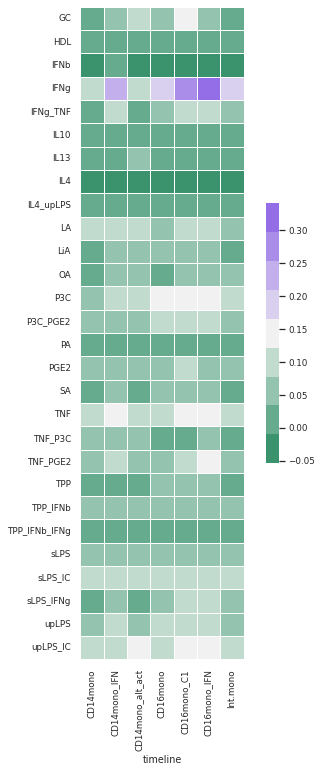

In [41]:
import matplotlib.pyplot as plt
sns.set(font_scale=0.8) # font size 2
fig, ax = plt.subplots(figsize=(8,12))  
pal = sns.diverging_palette(150, 275, s=80, l=55, n=9)
score_mean = scores.groupby('group').mean()
g = sns.heatmap(score_mean.T, cmap=pal,  annot=False,linewidths=1,  square=True, cbar_kws={"shrink": 0.4},annot_kws={"size": 10})
#plt.ylabel("WHO_temp_severity")
plt.xlabel("timeline")
#plt.savefig('./CD16mono_final.png',dpi=300,bbox_inches='tight')

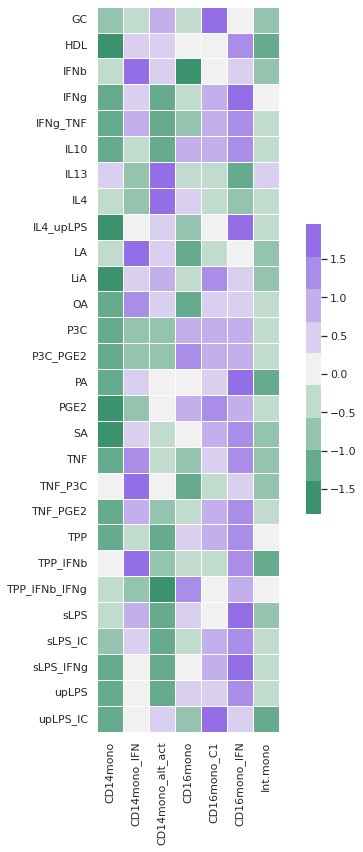

In [42]:
import matplotlib.pyplot as plt
sns.set(font_scale=1) # font size 2
fig, ax = plt.subplots(figsize=(8,12))  
pal = sns.diverging_palette(150, 275, s=80, l=55, n=9)
score_mean =scores.groupby('group').mean()
#Z_score the data
score_mean= (score_mean - score_mean.mean())/score_mean.std()

max_val = (max((np.array(score_mean)).max(0)))
min_val = (min((np.array(score_mean)).min(0)))
mid_val = (max((np.array(score_mean)).max(0))) - ((max((np.array(score_mean)).max(0))) - (min((np.array(score_mean)).min(0))))/2
g = sns.heatmap(score_mean.T, cmap=pal,  annot=False,vmin=min_val, vmax=max_val, linewidths=1, center=mid_val, square=True, cbar_kws={"shrink": 0.4},annot_kws={"size": 78})
#plt.ylabel("WHO_temp_severity")
plt.xlabel("")
plt.tight_layout()
#plt.savefig('/home/jovyan/scripts/renal_covid_19/sig_gene_plot/cytokine_sig_allmono_wave2_pos.pdf')

In [43]:
scores.head()

,GC,HDL,IFNb,IFNg,IFNg_TNF,IL10,IL13,IL4,IL4_upLPS,LA,...,TNF_PGE2,TPP,TPP_IFNb,TPP_IFNb_IFNg,sLPS,sLPS_IC,sLPS_IFNg,upLPS,upLPS_IC,group
UK-CIC10689738+UK-CIC10690026_AAATGCCAGAGACTTA-1,0.049949,-0.004628,-0.003459,0.031263,-0.026170,-0.022345,0.048651,-0.082824,-0.002454,0.015958,...,0.010520,0.014772,0.100252,0.078302,0.107045,0.202742,0.026055,0.130009,0.125705,CD14mono
UK-CIC10689738+UK-CIC10690026_AAATGCCAGAGGACGG-1,0.051610,-0.026891,-0.066610,0.191453,0.031087,0.018330,0.011151,-0.031309,-0.015451,0.055162,...,0.074217,-0.015808,0.042989,0.019653,0.042654,0.171416,0.025668,0.067554,0.166166,CD14mono
UK-CIC10689738+UK-CIC10690026_AAATGCCCAGGCGATA-1,0.115141,-0.042210,-0.033252,-0.006726,0.011457,0.025679,-0.042427,-0.045697,0.008137,0.056808,...,0.073695,0.031188,0.106260,0.025538,0.053287,0.087349,-0.033118,0.053983,0.143894,CD14mono
UK-CIC10689738+UK-CIC10690026_AAATGCCGTTGGAGGT-1,-0.000130,0.045538,-0.028750,0.245797,0.101679,-0.052875,0.028476,-0.012410,0.002338,0.288398,...,0.109031,0.093713,0.077280,-0.048283,-0.005891,0.034453,-0.005184,0.061848,0.113342,CD14mono_IFN
UK-CIC10689738+UK-CIC10690026_AACCATGAGGCAGGTT-1,0.141827,0.020300,-0.065123,0.173750,0.006495,-0.112860,0.080988,-0.034195,-0.020820,0.083660,...,0.028035,-0.033638,0.042570,-0.039571,0.036602,0.068346,0.011108,0.069688,0.067245,CD14mono


In [44]:
new_scores =scores[[
     'upLPS',
'sLPS',
'sLPS_IFNg',
'IFNg',
'IFNg_TNF',
'TNF',
    'IL13',
'IL4',
'IL4_upLPS',
'sLPS_IC',
'upLPS_IC',
'IL10',
'GC',
'HDL',
'IFNb',
'P3C',
'P3C_PGE2',
'PGE2',
'TNF_P3C',
'TNF_PGE2',
'TPP',
'TPP_IFNb',
'TPP_IFNb_IFNg',
'LA',
'LiA',
'OA',
'PA',
'SA','group']]

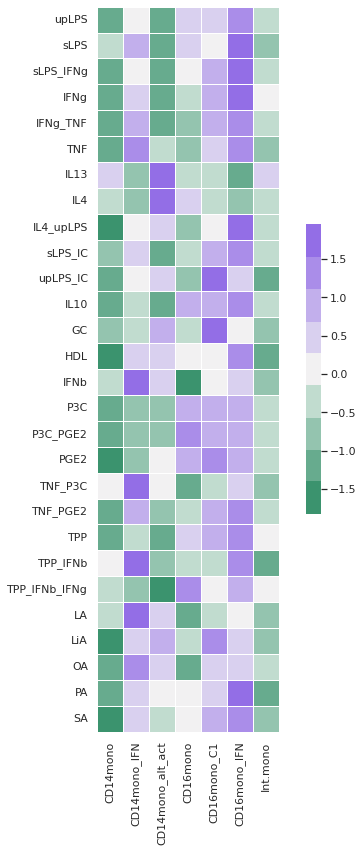

In [45]:
import matplotlib.pyplot as plt
sns.set(font_scale=1) # font size 2
fig, ax = plt.subplots(figsize=(8,12))  
pal = sns.diverging_palette(150, 275, s=80, l=55, n=9)
score_mean = new_scores.groupby('group').mean()
#Z_score the data
score_mean= (score_mean - score_mean.mean())/score_mean.std()

max_val = (max((np.array(score_mean)).max(0)))
min_val = (min((np.array(score_mean)).min(0)))
mid_val = (max((np.array(score_mean)).max(0))) - ((max((np.array(score_mean)).max(0))) - (min((np.array(score_mean)).min(0))))/2
g = sns.heatmap(score_mean.T, cmap=pal,  annot=False,vmin=min_val, vmax=max_val, linewidths=1, center=mid_val, square=True, cbar_kws={"shrink": 0.4},annot_kws={"size": 78})
#plt.ylabel("WHO_temp_severity")
plt.xlabel("")
plt.tight_layout()
#plt.savefig('/home/jovyan/scripts/renal_covid_19/sig_gene_plot/cytokine_sig_allmono_wave2_pos.pdf')

In [46]:
score_mean.head()

,upLPS,sLPS,sLPS_IFNg,IFNg,IFNg_TNF,TNF,IL13,IL4,IL4_upLPS,sLPS_IC,...,TNF_P3C,TNF_PGE2,TPP,TPP_IFNb,TPP_IFNb_IFNg,LA,LiA,OA,PA,SA
group,,,,,,,,,,,,,,,,,,,,,
CD14mono,-1.208133,-0.463503,-0.989255,-1.121203,-0.996944,-1.050247,0.532924,-0.248446,-1.434886,-0.579595,...,0.234988,-1.165582,-1.074835,-0.122403,-0.379876,-0.342456,-1.829264,-1.398362,-1.334744,-1.567912
CD14mono_IFN,0.053850,0.712111,0.073839,0.447612,0.766012,1.293365,-0.612675,-0.949057,0.215245,0.392226,...,1.759135,0.786292,-0.341317,1.554025,-0.797497,1.821981,0.320749,1.363577,0.362689,0.661132
CD14mono_alt_act,-1.061715,-1.339413,-1.379447,-1.178938,-0.999673,-0.452557,1.791063,1.952064,0.607626,-1.382104,...,0.168331,-0.853613,-1.399727,-0.742239,-1.507873,0.599066,0.832382,0.381823,-0.073846,-0.475954
CD16mono,0.602563,0.435937,0.247073,-0.366461,-0.707026,-0.793550,-0.461552,0.663335,-0.638151,-0.394505,...,-1.341665,-0.491768,0.667181,-0.345775,1.337934,-1.309262,-0.146547,-1.169666,-0.068303,-0.039137
CD16mono_C1,0.675346,-0.080055,0.700726,0.824491,0.773434,0.430725,-0.212951,-0.217905,0.118733,1.081634,...,-0.235798,0.743982,0.798125,-0.304011,0.047088,-0.215034,1.148003,0.570614,0.616861,0.737033


In [47]:
to_plot = score_mean.T

In [48]:
to_plot.head()

group,CD14mono,CD14mono_IFN,CD14mono_alt_act,CD16mono,CD16mono_C1,CD16mono_IFN,Int.mono
upLPS,-1.208133,0.053850,-1.061715,0.602563,0.675346,1.506131,-0.568042
sLPS,-0.463503,0.712111,-1.339413,0.435937,-0.080055,1.595779,-0.860857
sLPS_IFNg,-0.989255,0.073839,-1.379447,0.247073,0.700726,1.582844,-0.235779
IFNg,-1.121203,0.447612,-1.178938,-0.366461,0.824491,1.523766,-0.129269
IFNg_TNF,-0.996944,0.766012,-0.999673,-0.707026,0.773434,1.488802,-0.324605


In [49]:
to_plot.to_csv('/home/jovyan/scripts/renal_covid_19/sig_gene_plot/gene_score_to_plot_allmono_bothwave_pos.csv')